In [1]:
# Importing libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import pandas as pd

### Importing the data set

In [2]:
complete_sample = pd.read_csv('task_data.csv')

##### Drop the column (Sample index) not needed

In [3]:
sample = complete_sample.drop(['class_label','sample index'],axis=1)

## DATA EXPLORATION

In [4]:
sample.describe()

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


All the samples have similar mean and max values.

In [5]:
#Seperating label from the dataset and making it binary

label = complete_sample['class_label'].map({-1: 0, 1: 1})

In [6]:
# distribution of class labels

label.value_counts()

1    200
0    200
Name: class_label, dtype: int64

To explore the variables, we will start by:  
* Correlation matrix (heatmap style)
* Scatter plots to dive deeper in viewing the most correlated variables

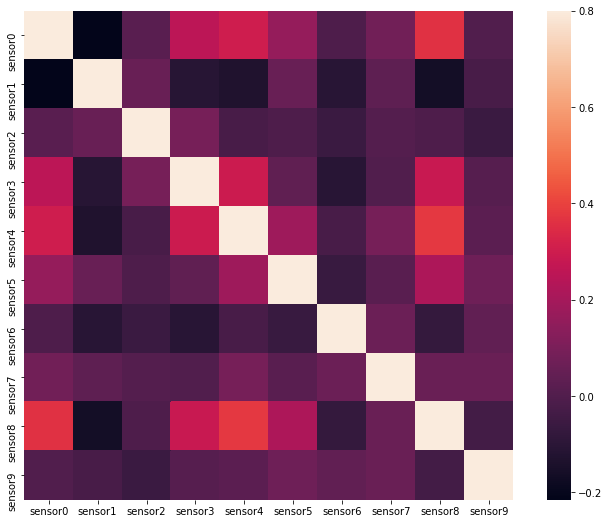

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


corrmat = sample.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

At first sight the red squares are a few. As there are no bright red squares we can assume no multicollinearity. 

Heatmaps are great to detect strong correlations and in this case we can't find any strong correlation

#### Scatter plots to explore any strong correlation.

Create Pairplot from Seaborn to see relationship between individual features and class_label

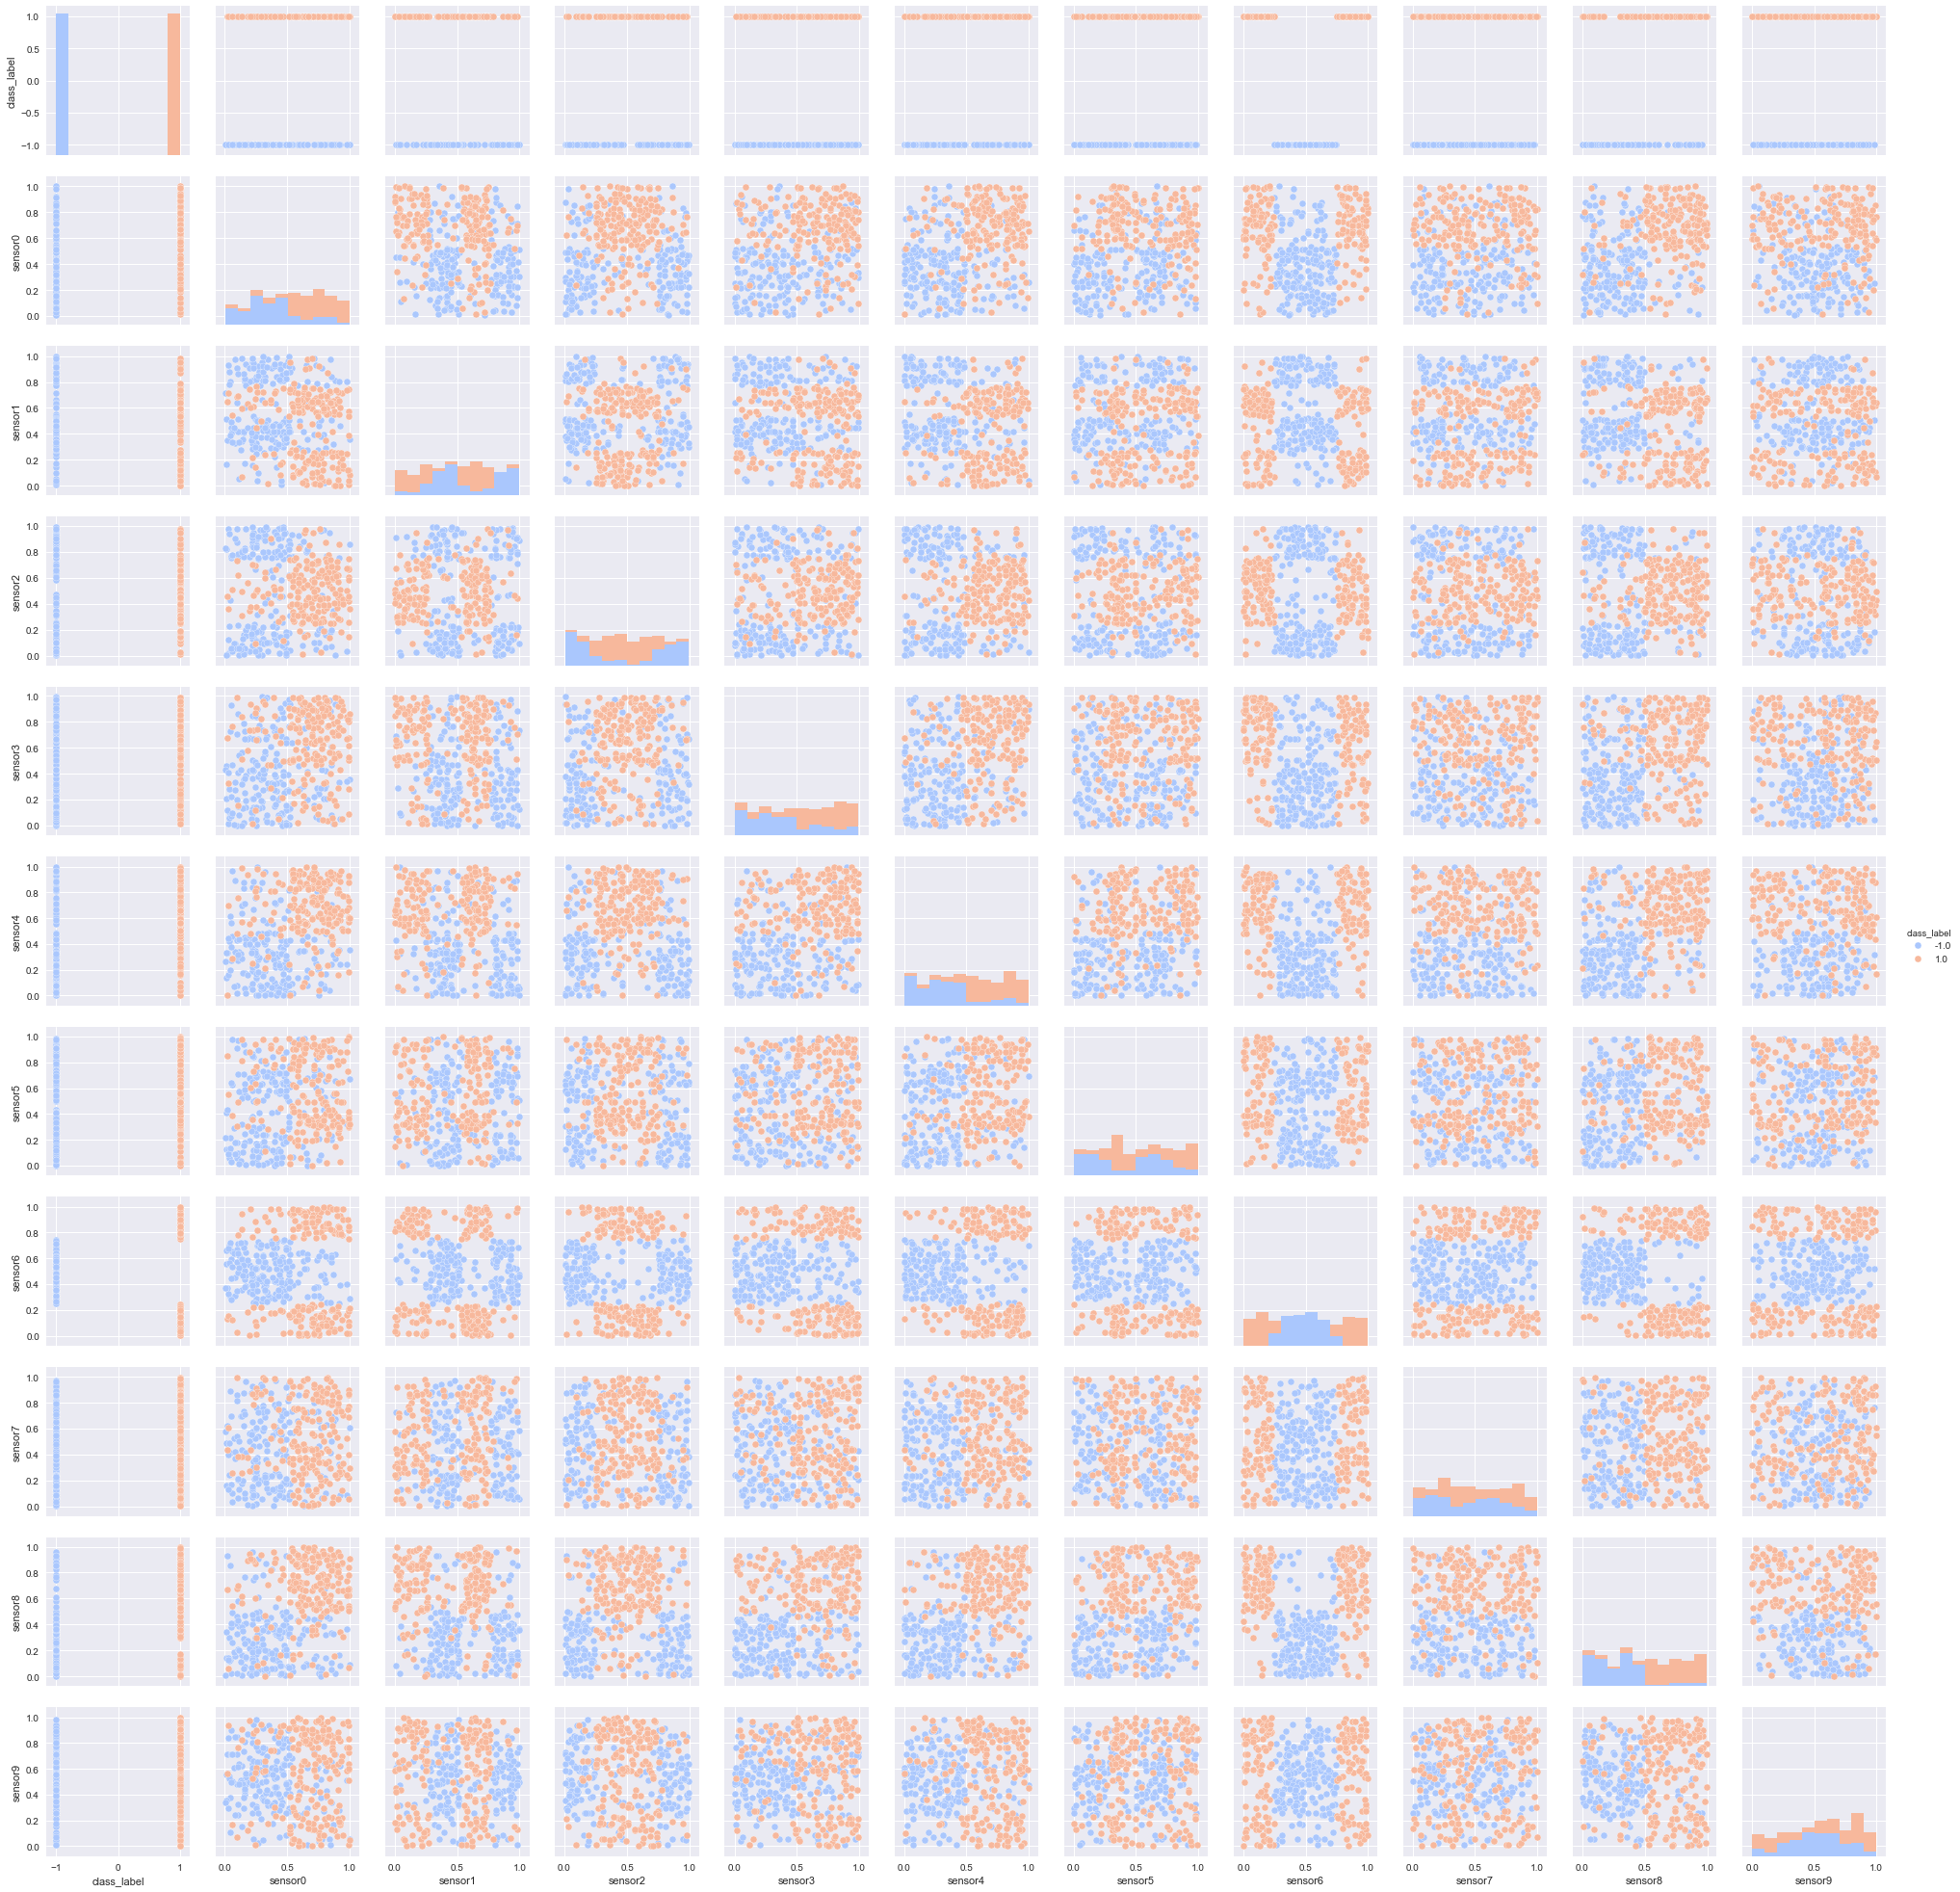

In [8]:
# Scatter/pair plot
sns.set()
sns.pairplot(complete_sample, size = 2.5,palette='coolwarm',hue= 'class_label')
plt.show();

From the pair plots we can assume theres no strong corellation between any of the sensors.

## Violing Plot

We use this to view the distribution of the values of each variable.

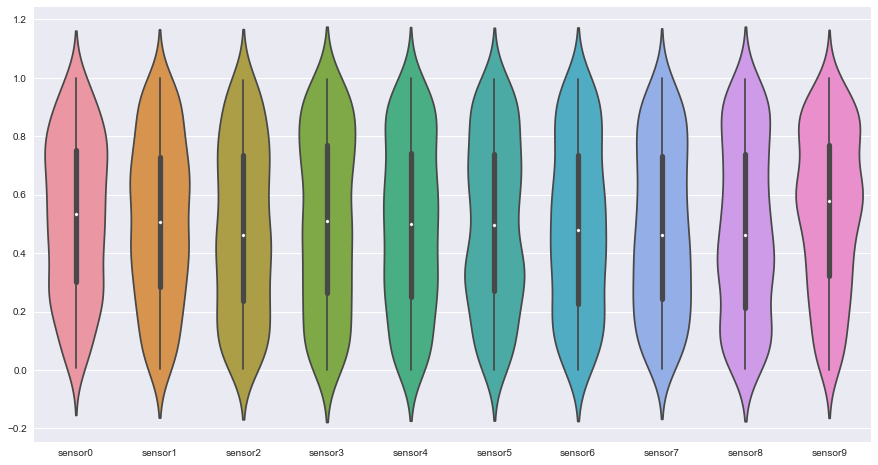

In [9]:
# Violin plot
plt.figure(figsize=(15,8))
sns.violinplot(data=sample)

The violin plot shows the sensor values have a similar distribution and median 

##  Build Random Forest Classifier 

Random Forest Classifier will use to find feature importances for the various features (sensors) in the dataset.

In [10]:
# Assign class_label to y and other features to X

y = label
X = sample

In [11]:
#Split data with 20% of data in the test set 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
#import the classfier from SKLearn
from sklearn.ensemble import RandomForestClassifier


#build the classfier
classifier=RandomForestClassifier(n_estimators=100)

#fit the model with our data
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
# Predict X_test values with the classifier

y_pred=classifier.predict(X_test)

In [14]:
# Compute accuracy score

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9875


In [15]:
# Print the sensors in descending order of feature importance

feature_imp = pd.Series(classifier.feature_importances_,index=sample.columns).sort_values(ascending=False)
feature_imp

sensor8    0.286576
sensor6    0.202650
sensor4    0.168875
sensor0    0.148008
sensor3    0.047142
sensor1    0.046353
sensor2    0.040196
sensor9    0.023015
sensor7    0.019625
sensor5    0.017560
dtype: float64

No handles with labels found to put in legend.


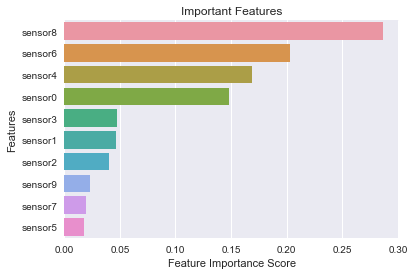

In [16]:
# Plot chart to show important features
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
plt.show()

In [17]:
# write important features to CSV

feature_imp.to_csv('sensor_ranking.csv',index=True)